<a href="https://colab.research.google.com/github/MLopita/Online_Shopping_Analysis/blob/main/Online_shopping_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")


In [68]:
import pandas as pd

customers = pd.read_csv('customers.csv', encoding='latin1')
orders = pd.read_csv('orders.csv', encoding='latin1')
order_items = pd.read_csv('order_items.csv', encoding='latin1')
payments = pd.read_csv('payments.csv', encoding='latin1')
sellers = pd.read_csv('sellers.csv', encoding='latin1')
geolocation = pd.read_csv('geolocation.csv', encoding='latin1')
products = pd.read_csv('products.csv', encoding='latin1')



In [69]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')


**Unique cities where customers are located**

In [70]:
unique_cities = customers['customer_city'].nunique()
print("Unique customer cities:", unique_cities)

Unique customer cities: 4119


/tmp/ipython-input-2749128194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Customer_Count', y='City', data=top_cities, palette='viridis')


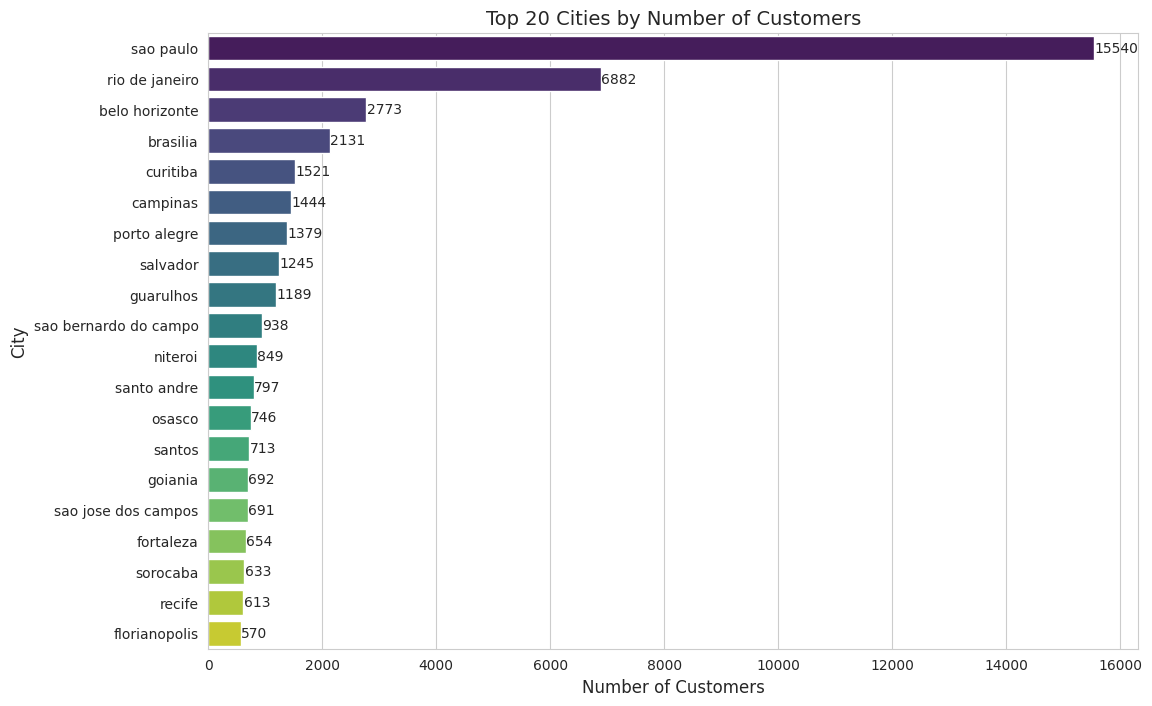

In [71]:
city_counts = customers['customer_city'].value_counts().reset_index()
city_counts.columns = ['City', 'Customer_Count']

top_cities = city_counts.head(20)
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Customer_Count', y='City', data=top_cities, palette='viridis')
plt.title('Top 20 Cities by Number of Customers', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)

for i, (count, city) in enumerate(zip(top_cities['Customer_Count'], top_cities['City'])):
    ax.text(count + 10, i, f'{count}', va='center', fontsize=10)

plt.show()

**Number of orders placed in 2017**

In [72]:
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]
print("Orders in 2017:", orders_2017.shape[0])

Orders in 2017: 45101


/tmp/ipython-input-2171053445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='orders', data=orders_per_month, palette='Blues_d')


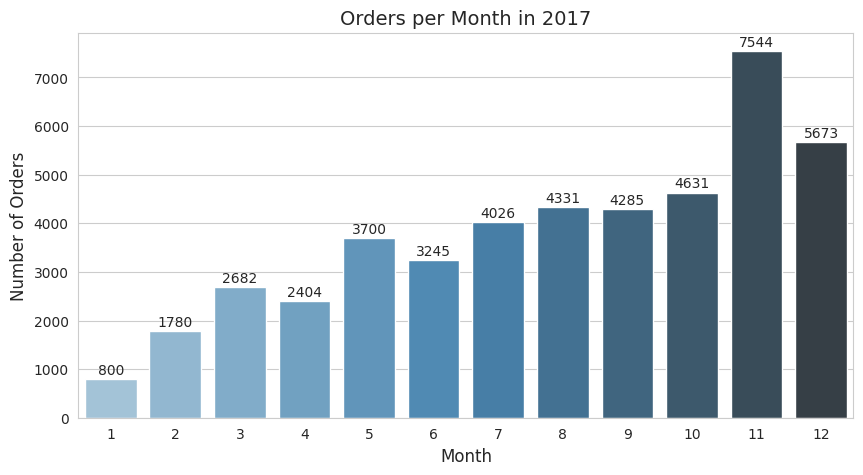

In [73]:
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]
orders_per_month = orders_2017.groupby(orders_2017['order_purchase_timestamp'].dt.month).size().reset_index(name='orders')
orders_per_month.rename(columns={'order_purchase_timestamp':'month'}, inplace=True)


plt.figure(figsize=(10,5))
ax = sns.barplot(x='month', y='orders', data=orders_per_month, palette='Blues_d')
plt.title('Orders per Month in 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

for i, row in orders_per_month.iterrows():
    ax.text(i, row['orders'] + 100, f"{row['orders']}", ha='center', fontsize=10)

plt.show()

**Total Sales per Product Category**

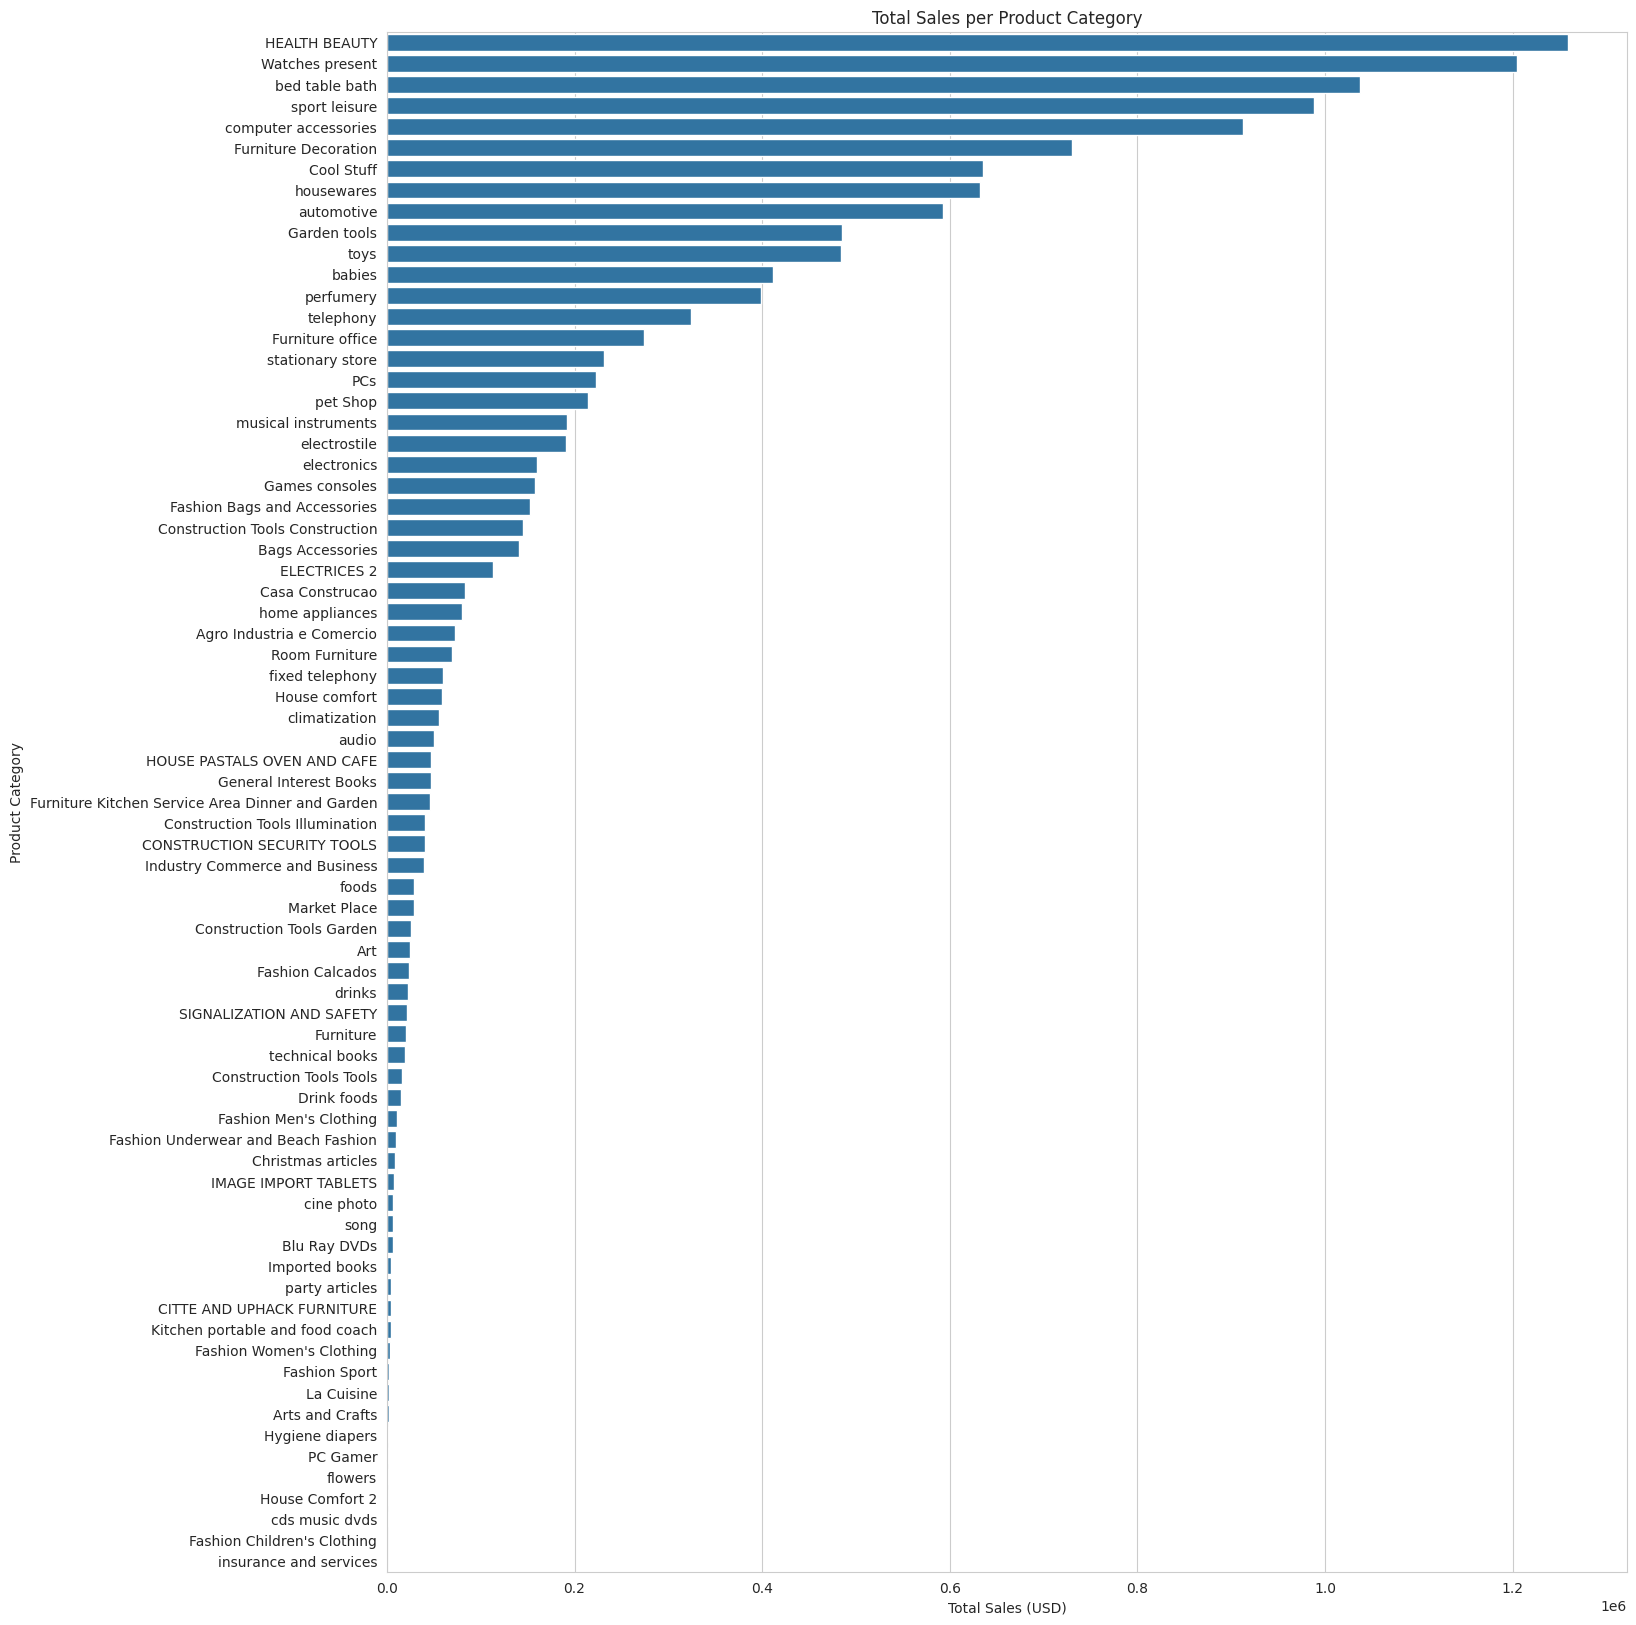

In [74]:
merged = order_items.merge(products, on='product_id', how='left')
sales_category = merged.groupby('product category')['price'].sum().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(16,20))
sns.barplot(x='price', y='product category', data=sales_category)
plt.title('Total Sales per Product Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Category')
plt.show()


**Percentage of orders that were paid in installments**

In [75]:
installment_percentage = round((payments['payment_installments'] > 1).sum() / len(payments) * 100, 2)
installment_percentage

np.float64(49.42)

**Number of customers per state**

/tmp/ipython-input-1405826910.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Customer_Count', y='State', data=cust_per_state, palette='coolwarm')


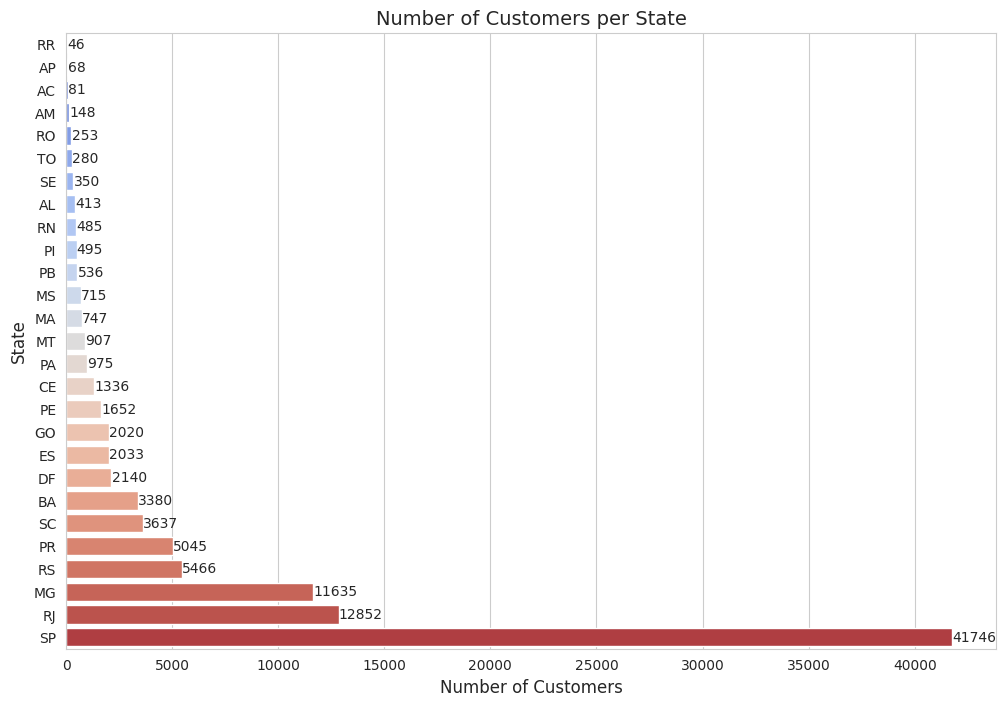

In [76]:
cust_per_state = customers['customer_state'].value_counts().reset_index()
cust_per_state.columns = ['State', 'Customer_Count']

cust_per_state = cust_per_state.sort_values(by='Customer_Count', ascending=True)


plt.figure(figsize=(12,8))
ax = sns.barplot(x='Customer_Count', y='State', data=cust_per_state, palette='coolwarm')
plt.title('Number of Customers per State', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('State', fontsize=12)


for i, (count, state) in enumerate(zip(cust_per_state['Customer_Count'], cust_per_state['State'])):
    ax.text(count + 5, i, f'{count}', va='center', fontsize=10)
plt.show()


**Number of orders per month in 2018**

In [77]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
print("Orders in 2018:", orders_2018.shape[0])

Orders in 2018: 54011


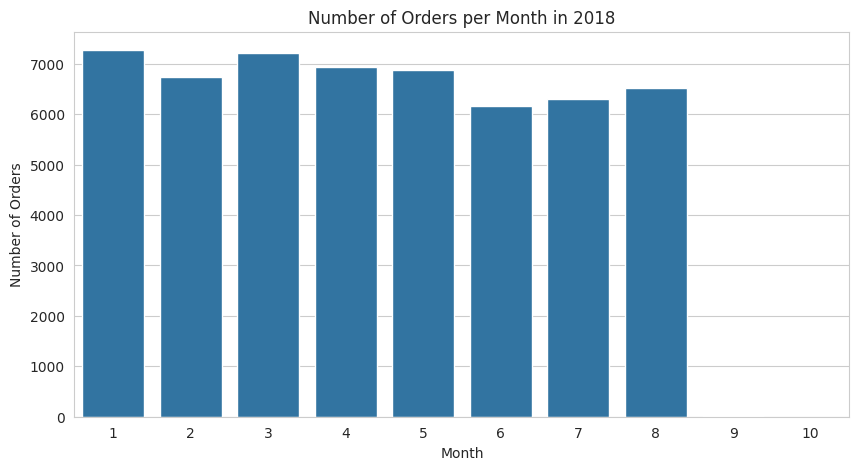

In [78]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
orders_month = orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month).size().reset_index(name='Orders')

plt.figure(figsize=(10,5))
sns.barplot(x='order_purchase_timestamp', y='Orders', data=orders_month)
plt.title('Number of Orders per Month in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

plt.show()

**Average number of products per order grouped by customer city**

/tmp/ipython-input-3161166898.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Avg_Products_per_Order', y='City', data=top_cities, palette='magma')


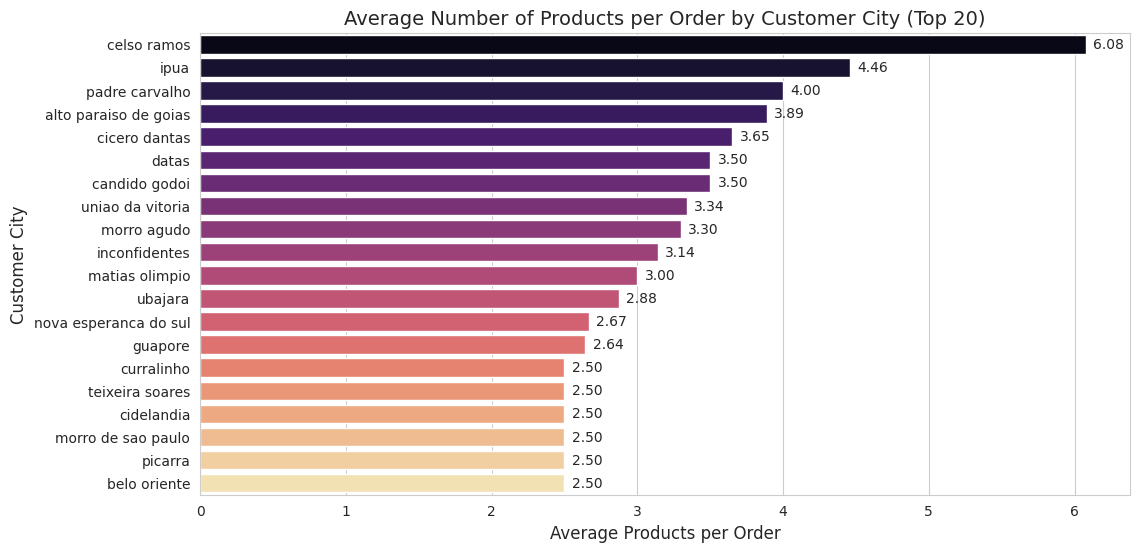

In [79]:
merged_orders = order_items.merge(orders[['order_id','customer_id']], on='order_id', how='left')
merged_orders = merged_orders.merge(customers[['customer_id','customer_city']], on='customer_id', how='left')

avg_products_city = merged_orders.groupby('customer_city')['order_item_id'].mean().reset_index()
avg_products_city.columns = ['City','Avg_Products_per_Order']


top_cities = avg_products_city.sort_values(by='Avg_Products_per_Order', ascending=False).head(20)


plt.figure(figsize=(12,6))
ax = sns.barplot(x='Avg_Products_per_Order', y='City', data=top_cities, palette='magma')
plt.title('Average Number of Products per Order by Customer City (Top 20)', fontsize=14)
plt.xlabel('Average Products per Order', fontsize=12)
plt.ylabel('Customer City', fontsize=12)

for i, row in enumerate(top_cities['Avg_Products_per_Order']):
    ax.text(row + 0.05, i, f"{row:.2f}", va='center', fontsize=10)

**Percentage of total revenue by product category**

/tmp/ipython-input-3480691903.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Revenue_Pct', y='product category', data=revenue_category, palette='viridis')


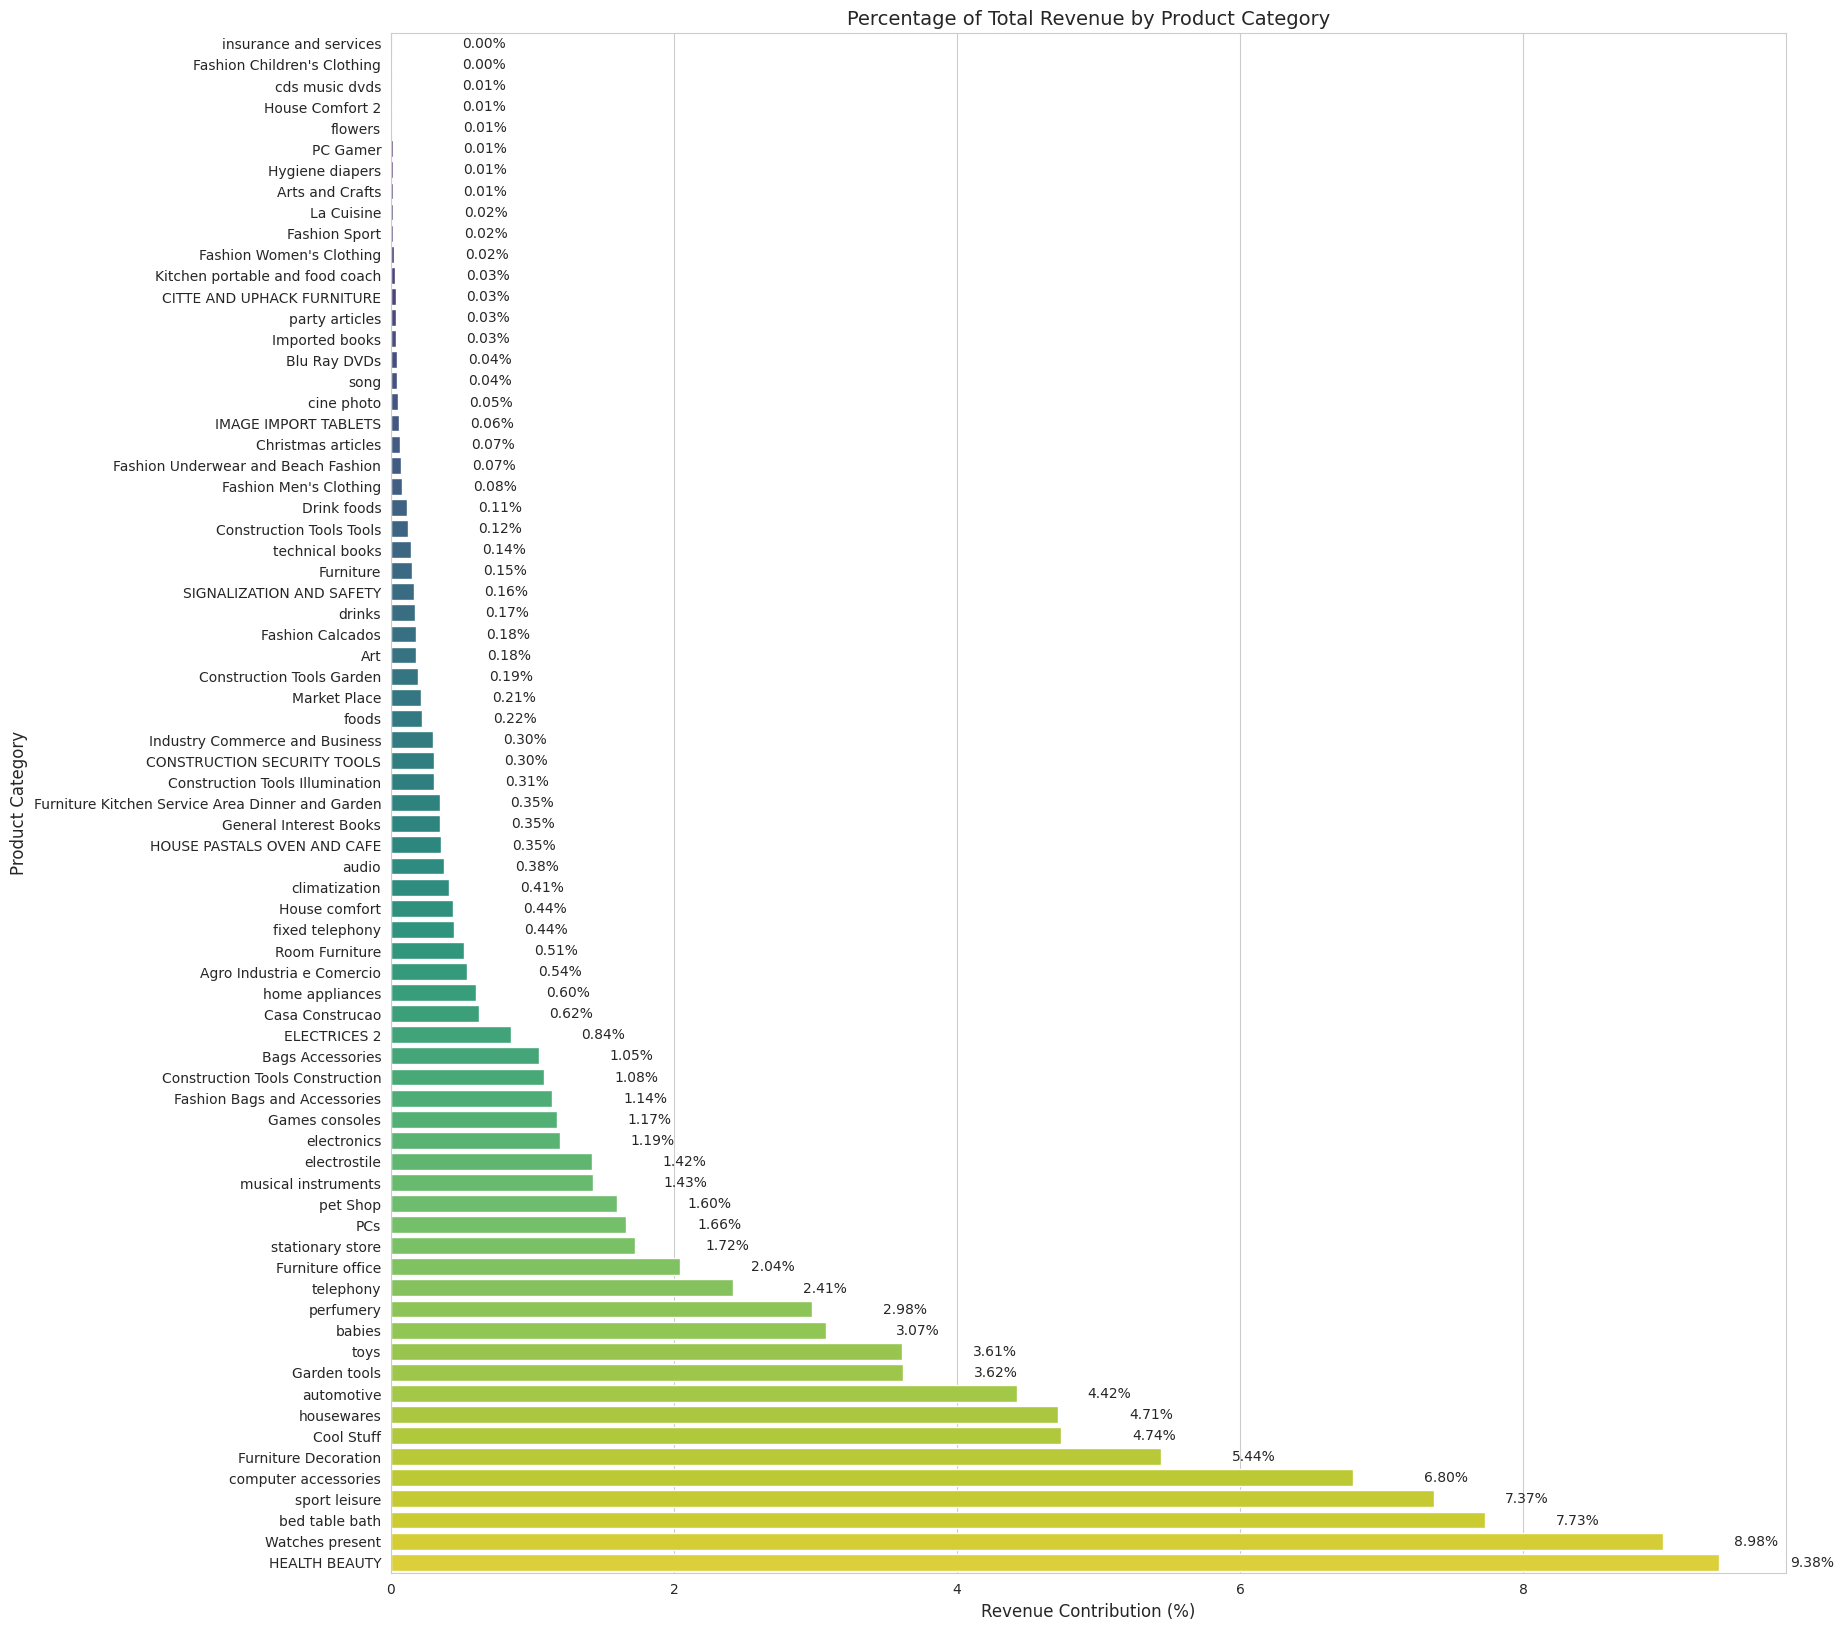

In [80]:
merged = order_items.merge(products, on='product_id', how='left')


revenue_category = merged.groupby('product category')['price'].sum().reset_index()
revenue_category['Revenue_Pct'] = 100 * revenue_category['price'] / revenue_category['price'].sum()
revenue_category = revenue_category.sort_values('Revenue_Pct', ascending=True)

plt.figure(figsize=(18,20))
ax = sns.barplot(x='Revenue_Pct', y='product category', data=revenue_category, palette='viridis')
plt.title('Percentage of Total Revenue by Product Category', fontsize=14)
plt.xlabel('Revenue Contribution (%)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

for i, row in enumerate(revenue_category['Revenue_Pct']):
    ax.text(row + 0.5, i, f"{row:.2f}%", va='center', fontsize=10)

plt.show()


**Correlation: product price vs times purchased**

In [81]:
product_sales = order_items.groupby('product_id').agg(
    avg_price=('price', 'mean'),
    times_purchased=('order_id', 'count')
).reset_index()

correlation = product_sales['avg_price'].corr(product_sales['times_purchased'])
correlation

np.float64(-0.032139862680945167)

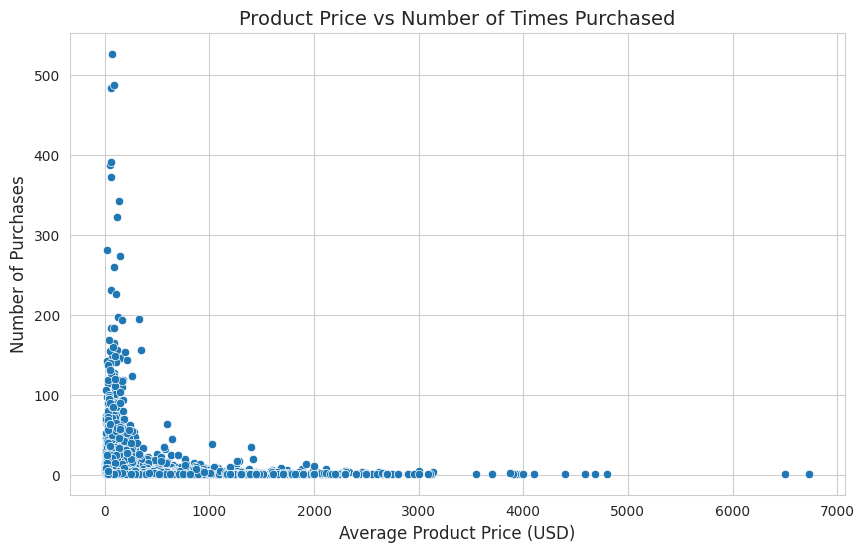

In [82]:
product_sales = order_items.groupby('product_id').agg({'price':'mean','order_item_id':'count'}).reset_index()
product_sales.columns = ['Product_ID','Avg_Price','Num_Purchased']

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Avg_Price', y='Num_Purchased', data=product_sales)
plt.title('Product Price vs Number of Times Purchased', fontsize=14)
plt.xlabel('Average Product Price (USD)', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

plt.show()


**Total revenue per seller & ranking**

/tmp/ipython-input-1673463052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price', y='seller_id', data=seller_revenue.tail(20), palette='coolwarm')


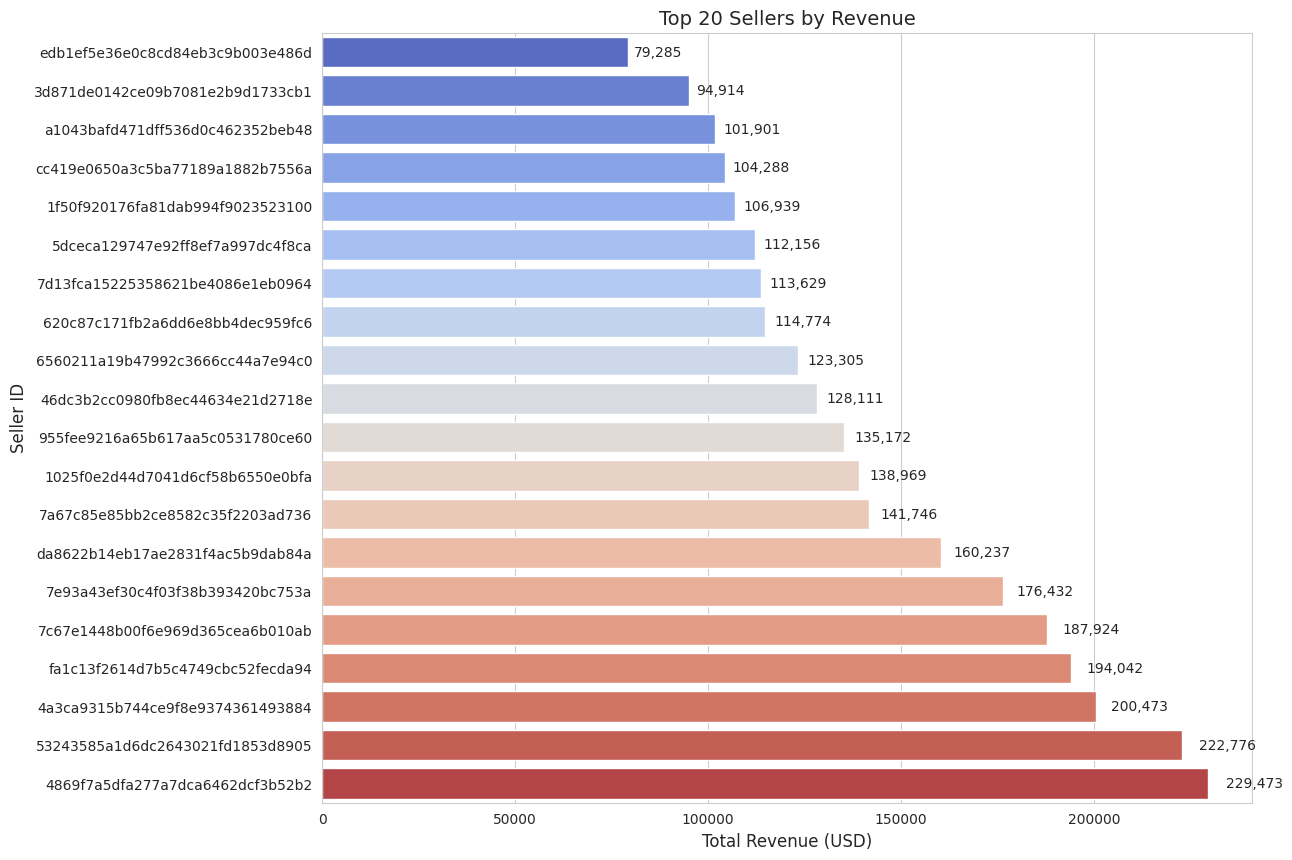

In [83]:
seller_revenue = order_items.groupby('seller_id')['price'].sum().reset_index()
seller_revenue = seller_revenue.sort_values('price', ascending=True)
plt.figure(figsize=(12,10))
ax = sns.barplot(x='price', y='seller_id', data=seller_revenue.tail(20), palette='coolwarm')
plt.title('Top 20 Sellers by Revenue', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Seller ID', fontsize=12)

for i, row in enumerate(seller_revenue.tail(20)['price']):
    ax.text(row + 0.02*row, i, f"{row:,.0f}", va='center', fontsize=10)

plt.show()


**Moving average of order values per customer**

In [84]:
order_totals = order_items.groupby('order_id')['price'].sum().reset_index()
orders_ma = orders[['order_id', 'customer_id', 'order_purchase_timestamp']].merge(order_totals, on='order_id', how='left')
orders_ma = orders_ma.sort_values(['customer_id', 'order_purchase_timestamp'])

orders_ma['moving_avg'] = orders_ma.groupby('customer_id')['price'].transform(lambda x: x.rolling(3, min_periods=1).mean())
orders_ma.head(5)


,order_id,customer_id,order_purchase_timestamp,price,moving_avg
68578,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,89.80,89.80
10013,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,54.90,54.90
65884,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,179.99,179.99
43174,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,149.90,149.90
5888,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,93.00,93.00


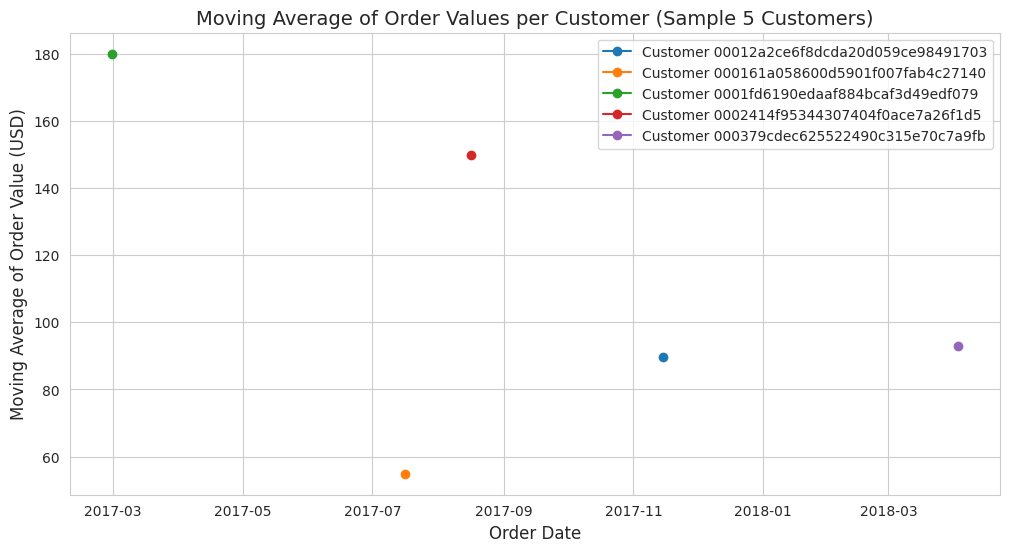

In [85]:
order_totals = order_items.groupby('order_id')['price'].sum().reset_index()
orders_ma = orders[['order_id','customer_id','order_purchase_timestamp']].merge(order_totals, on='order_id', how='left')
orders_ma['order_purchase_timestamp'] = pd.to_datetime(orders_ma['order_purchase_timestamp'])
orders_ma = orders_ma.sort_values(['customer_id','order_purchase_timestamp'])

orders_ma['moving_avg'] = orders_ma.groupby('customer_id')['price'].transform(lambda x: x.rolling(3, min_periods=1).mean())

sample_customers = orders_ma['customer_id'].unique()[:5]
plt.figure(figsize=(12,6))
for cid in sample_customers:
    subset = orders_ma[orders_ma['customer_id'] == cid]
    plt.plot(subset['order_purchase_timestamp'], subset['moving_avg'], marker='o', label=f'Customer {cid}')

plt.title('Moving Average of Order Values per Customer (Sample 5 Customers)', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Moving Average of Order Value (USD)', fontsize=12)
plt.legend()
plt.show()


**Year-over-Year Growth Rate**

   year       price  YoY_Growth_%
0  2016    49785.92           NaN
1  2017  6155806.98  12264.554035
2  2018  7386050.80     19.985094


/tmp/ipython-input-4020021103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='YoY_Growth_%', data=plot_data, palette='Blues_d')


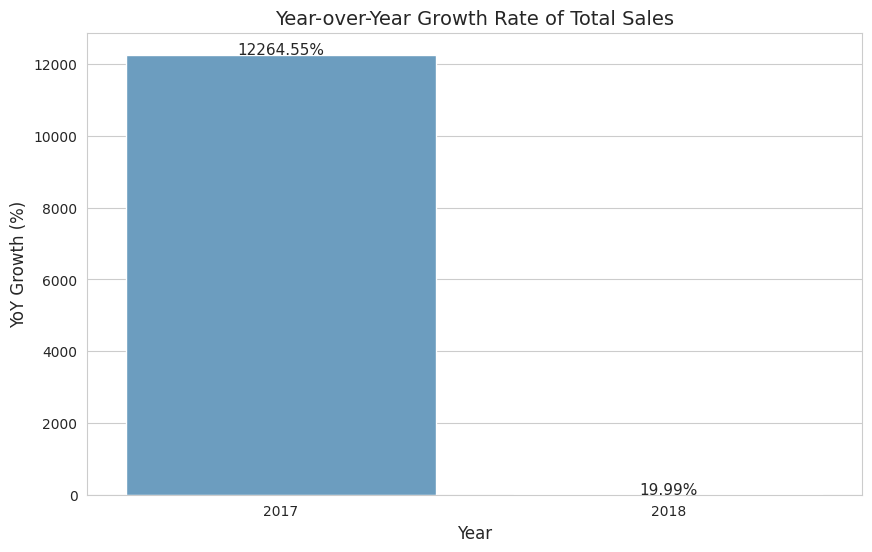

In [86]:
merged_orders = orders.merge(order_items, on='order_id', how='left')
merged_orders['order_purchase_timestamp'] = pd.to_datetime(merged_orders['order_purchase_timestamp'], errors='coerce')
merged_orders['year'] = merged_orders['order_purchase_timestamp'].dt.year
yearly_sales = merged_orders.groupby('year')['price'].sum().reset_index()
yearly_sales['YoY_Growth_%'] = yearly_sales['price'].pct_change() * 100
print(yearly_sales)

plot_data = yearly_sales[yearly_sales['year'] >= 2017]

plt.figure(figsize=(10,6))
ax = sns.barplot(x='year', y='YoY_Growth_%', data=plot_data, palette='Blues_d')
plt.title('Year-over-Year Growth Rate of Total Sales', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Growth (%)', fontsize=12)

for i, row in plot_data.iterrows():
    ax.text(row['year']-2017, row['YoY_Growth_%'] + 0.5, f"{row['YoY_Growth_%']:.2f}%", ha='center', fontsize=11)

plt.show()


**Top 3 customers who spent the most money in each year**

In [91]:
order_totals = order_items.groupby('order_id')['price'].sum().reset_index()
merged_data = orders.merge(order_totals, on='order_id', how='left')
merged_data['Year'] = pd.to_datetime(merged_data['order_purchase_timestamp']).dt.year
yearly_spending = merged_data.groupby(['Year', 'customer_id'])['price'].sum().reset_index()
yearly_spending.columns = ['Year', 'customer_id', 'total_spent']
top3_customers = (
    yearly_spending.groupby('Year')
    .apply(lambda x: x.nlargest(3, 'total_spent'))
    .reset_index(drop=True)
)
top3_customers

/tmp/ipython-input-3057095779.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'total_spent'))


,Year,customer_id,total_spent
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1399.00
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1299.99
2,2016,4a06381959b6670756de02e07b83815f,1199.00
3,2017,1617b1357756262bfa56ab541c47bc16,13440.00
4,2017,c6e2731c5b391845f6800c97401a43a9,6735.00
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
6,2018,ec5b2ba62e574342386871631fafd3fc,7160.00
7,2018,f48d464a0baaea338cb25f816991ab1f,6729.00
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4599.90


**Retention rate of customers (within 6 months of first purchase)**

In [88]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

first_purchase = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
orders = orders.merge(first_purchase, on='customer_id', suffixes=('', '_first'))

orders['month_diff'] = ((orders['order_purchase_timestamp'] - orders['order_purchase_timestamp_first']).dt.days) / 30
retained_customers = orders[orders['month_diff'] <= 6]['customer_id'].nunique()
total_customers = first_purchase.shape[0]
retention_rate = round(retained_customers / total_customers * 100, 2)
retention_rate


100.0